In [ ]:
#HW 4. We will use scikit-learn and tensorflow to fit linear and logistic regression
#It will illustrate the notion of gradient descent

In [ ]:
#Part 1.1 Create a toy dataset consisting of 150 observations defined by y=6x+5+noise with noise scale equal to .2. Visualise the data set.

In [1]:
#creating dataset
import numpy as np
N=150
w_true=6
b_true=5
noise_scale=.2
X=np.random.rand(N, 1)
noise=np.random.normal(scale=noise_scale, size=(N,1))
y=w_true * X+b_true+noise

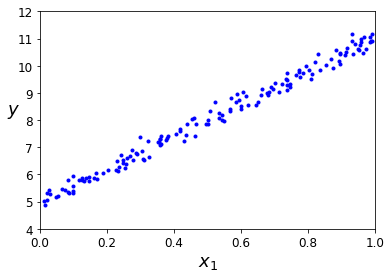

In [2]:
#plotting the data (for visualization purposes only)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, 4, 12])
plt.show()

In [26]:
#Part 1.2. Fit simple linear regression using the normal equasion using matrix multiplications in numpy

In [3]:
#fitting linear regression by solving the normal equasion using simple numpy operations, displaying coefficients
#.dot is a numpy method for matrix multiplications

X_b = np.c_[np.ones((150, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best
#note that the first coefficiet refers to bias  b(intercept) and the second to weight w (intercept)

array([[ 4.99604005],
       [ 6.03001183]])

In [4]:
#making predictions
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.99604005],
       [ 11.02605188]])

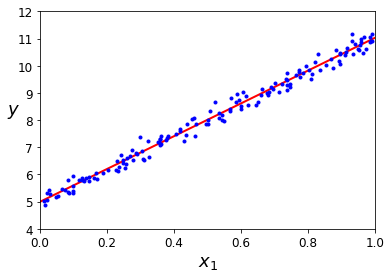

In [5]:
#plotting the data (for visualization purposes only)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 1, 4, 12])
plt.show()

In [ ]:
#Part 1.3. Fit linear regression using sklearn LinearRegression estimator.

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.99604005]), array([[ 6.03001183]]))

In [25]:
lin_reg.predict(X_new)

array([[  5.02258006],
       [ 10.96973952]])

In [ ]:
#Part 1.4. Fit linear regression using gradient descent algorithm with at least 1000 ovservations
#display weights theta_best_GD
#make predictions for X_new = np.array([[4], [3]])

In [7]:
eta = 0.1
n_iterations = 1000
m = 150
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta_best_GD=theta
theta_best_GD

array([[ 4.99604126],
       [ 6.03000965]])

In [50]:
#making predictions
X_new = np.array([[4], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 29.11608738],
       [ 17.05606372]])

In [51]:
#Part 1.5. Fit linear regression using stochastic gradient descent algorithm
#Use Sklearn SGDRegressor class
#display coefficients, make predictions for X_new

In [9]:
#fitting linear regression using 
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


(array([ 4.99269141]), array([ 6.02585911]))

In [10]:
sgd_reg.predict(X_new)

array([ 23.07026874,  11.01855052])

In [ ]:
#Part 2. Fit logistic regression on iris dataset
#This part of the HW4 is based entirely on the Ch.4. exercise in Geron's book
#Available at https://github.com/ageron/handson-ml/blob/53725990c09523a7ff2f6728c3f8ca17443e8009/04_training_linear_models.ipynb

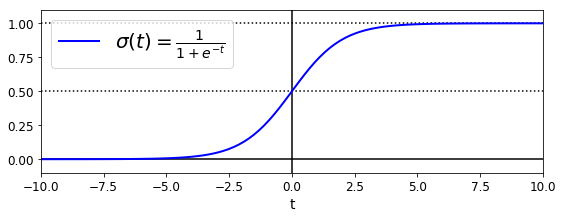

In [31]:
#Visualising logistic function using pyplot
#Notice that logistic function simply squeezes the space of real numbers into the space from zero to 1
#Think, probability

import matplotlib.pyplot as plt
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [32]:
#Import Iris dataset that is included with sklearn

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [15]:
#you can access the dataset description by running code print(iris.DESCR)
print(iris.DESCR)

In [35]:
#Get a subset of data, petal width and whether or not the flower is Iris-Virginica
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [36]:
#Import and fit LogisticRegression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

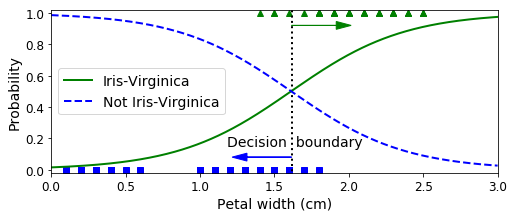

In [37]:
#Visualise the decision boundary by plotting petal width vs. probability of Iris-Virginica

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [21]:
# display decision boundary
decision_boundary

array([ 1.61561562])

In [38]:
# find prediction for petal width 2, 1.59
log_reg.predict([[2], [1.59]])

array([1, 0])

In [39]:
# fit softmax (or multinomial) regression using both petal length and petal width
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

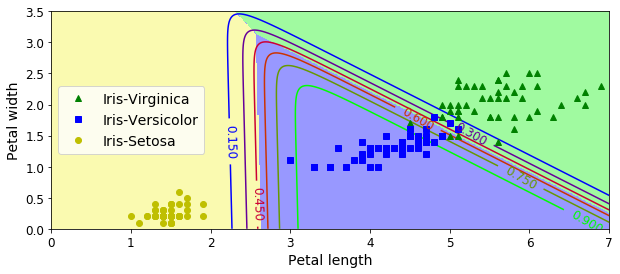

In [40]:
#Visualize decision boundary for softmax regression

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [43]:
#Predict class for length 4 and width 2
softmax_reg.predict([[4, 2]])

array([1])

In [44]:
#Predict class for length 4 and width 2
softmax_reg.predict_proba([[4, 2]])

array([[ 0.00102836,  0.81204487,  0.18692677]])

In [45]:
#Part 3. Run linear regression using tensor flow.
#Notice that you first import tensorflow and numpy, then create a dataset
#Then you define your graph that consists of placeholders and variables
#Then you open a session and evaluate your graph by feeding data into it
#Play with the number of iterations. 
#How many iterations do you need to bring the loss to less than 1?

In [46]:
#the setup
import numpy as np
import  tensorflow as tf
tf.set_random_seed(456)


In [47]:
# Generate synthetic data

N = 100
w_true = 5
b_true = 2
noise_scale = .1
X_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * X_np  + b_true + noise, (-1))


In [48]:
# Generate tensorflow graph

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 1))
    y = tf.placeholder(tf.float32, (N,))

with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal((1, 1)))
    b = tf.Variable(tf.random_normal((1,)))

with tf.name_scope("prediction"):
    y_pred = tf.matmul(x, W) + b

with tf.name_scope("loss"):
    l = tf.reduce_sum((y - tf.squeeze(y_pred))**2)

with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)

with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()
    

In [49]:
#Evaluate the graph

n_steps = 5000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
# Train model
    for i in range(n_steps):
        feed_dict = {x: X_np, y: y_np}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        if i%500==0:
            print("step %d, loss: %f" % (i, loss))
    w_final, b_final = sess.run([W, b])
    print("Final loss: ", loss, "Final W=", w_final, " Final b=", b_final)
    

step 0, loss: 2758.636230
step 500, loss: 2031.899170
step 1000, loss: 1456.606445
step 1500, loss: 1009.111938
step 2000, loss: 669.634766
step 2500, loss: 421.066528
step 3000, loss: 247.894119
step 3500, loss: 135.360748
step 4000, loss: 68.997070
step 4500, loss: 34.738476
Final loss:  19.8501 Final W= [[ 3.5507679]]  Final b= [ 2.57970452]


In [5]:
sess.close()